In [47]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [48]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [49]:
data_dir

'.\\datasets\\flower_photos'

In [50]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [51]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [52]:
roses = list(data_dir.glob('roses/*'))

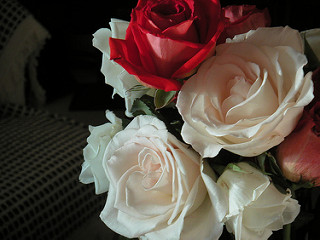

In [53]:
PIL.Image.open(str(roses[1]))

In [54]:
tulips = list(data_dir.glob('tulips/*'))

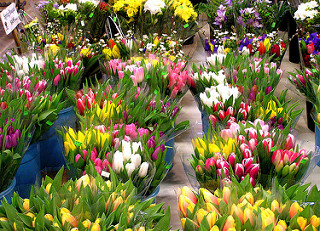

In [55]:
PIL.Image.open(str(tulips[7]))

In [56]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [57]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [58]:
img = cv2.imread(flowers_images_dict['roses'][0])
img.shape

(240, 179, 3)

In [59]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [60]:
X, y =[], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img,(180,180))
        X.append(resize_image)
        y.append(flowers_labels_dict[flower_name])

In [61]:
X = np.array(X)
y = np.array(y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
len(X_train)

2936

In [64]:
len(X_test)

734

In [65]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [66]:
X_train_scaled[2]

array([[[0.05882353, 0.15294118, 0.12156863],
        [0.0627451 , 0.15294118, 0.12156863],
        [0.06666667, 0.14901961, 0.11764706],
        ...,
        [0.07843137, 0.55686275, 0.61960784],
        [0.11764706, 0.61176471, 0.67843137],
        [0.05882353, 0.5254902 , 0.6       ]],

       [[0.0745098 , 0.15686275, 0.12941176],
        [0.0745098 , 0.15686275, 0.12941176],
        [0.07058824, 0.15294118, 0.12156863],
        ...,
        [0.08235294, 0.56470588, 0.62352941],
        [0.1372549 , 0.63137255, 0.69019608],
        [0.08627451, 0.54901961, 0.61176471]],

       [[0.08627451, 0.15294118, 0.1254902 ],
        [0.08235294, 0.15294118, 0.1254902 ],
        [0.06666667, 0.14509804, 0.11372549],
        ...,
        [0.08627451, 0.56470588, 0.61960784],
        [0.15686275, 0.64313725, 0.69411765],
        [0.11372549, 0.57254902, 0.62745098]],

       ...,

       [[0.06666667, 0.09803922, 0.09411765],
        [0.05490196, 0.09803922, 0.09019608],
        [0.05098039, 0

In [68]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 11s 35ms/step - loss: 1.2858 - accuracy: 0.4622
Epoch 2/30
92/92 [==============================] - 3s 30ms/step - loss: 0.9527 - accuracy: 0.6379
Epoch 3/30
92/92 [==============================] - 3s 30ms/step - loss: 0.7943 - accuracy: 0.7044
Epoch 4/30
92/92 [==============================] - 3s 29ms/step - loss: 0.6004 - accuracy: 0.7762
Epoch 5/30
92/92 [==============================] - 3s 30ms/step - loss: 0.3896 - accuracy: 0.8600
Epoch 6/30
92/92 [==============================] - 3s 29ms/step - loss: 0.2395 - accuracy: 0.9223
Epoch 7/30
92/92 [==============================] - 3s 29ms/step - loss: 0.1233 - accuracy: 0.9619
Epoch 8/30
92/92 [==============================] - 3s 29ms/step - loss: 0.0707 - accuracy: 0.9802
Epoch 9/30
92/92 [==============================] - 3s 29ms/step - loss: 0.0400 - accuracy: 0.9915
Epoch 10/30
92/92 [==============================] - 3s 29ms/step - loss: 0.0288 - accuracy: 0.9935
Epoch 11

In [71]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 0s 14ms/step - loss: 3.3049 - accuracy: 0.6567


[3.3049046993255615, 0.6566757559776306]

In [73]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 0s 13ms/step


array([[ 12.519653 , -15.608739 ,  -8.620782 ,  -2.17156  ,   8.317931 ],
       [ -4.7414203, -20.329035 ,   8.311261 ,  19.45464  ,  -1.1056639],
       [  1.0088638,  -0.8830733,  -4.120433 ,   3.7379117,   1.3904552],
       ...,
       [  4.3132844,   8.719497 ,  -7.013241 ,  -6.6862264,   1.1320195],
       [  2.3778107,   3.34551  ,   9.954583 , -17.756649 ,  -3.1669521],
       [  3.0352478, -11.829862 ,   3.0963466,   1.964156 ,   2.069058 ]],
      dtype=float32)

In [75]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.8525059e-01, 5.9915836e-13, 6.4919142e-10, 4.1042492e-07,
       1.4748980e-02], dtype=float32)>

In [76]:
np.argmax(score)

0

In [77]:
y_test[0]

0

In [114]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

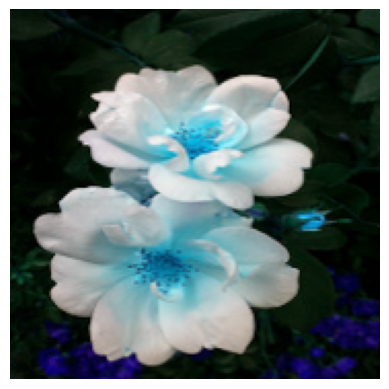

In [115]:
plt.axis('off')
plt.imshow(X[0])

In [116]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
92/92 [==============================] - 26s 237ms/step - loss: 1.2975 - accuracy: 0.4343
Epoch 2/30
92/92 [==============================] - 23s 255ms/step - loss: 1.0635 - accuracy: 0.5790
Epoch 3/30
92/92 [==============================] - 21s 229ms/step - loss: 0.9674 - accuracy: 0.6199
Epoch 4/30
92/92 [==============================] - 21s 229ms/step - loss: 0.8860 - accuracy: 0.6512
Epoch 5/30
92/92 [==============================] - 21s 227ms/step - loss: 0.8344 - accuracy: 0.6822
Epoch 6/30
92/92 [==============================] - 21s 228ms/step - loss: 0.7789 - accuracy: 0.6999
Epoch 7/30
92/92 [==============================] - 23s 249ms/step - loss: 0.7228 - accuracy: 0.7238
Epoch 8/30
92/92 [==============================] - 23s 252ms/step - loss: 0.6747 - accuracy: 0.7415
Epoch 9/30
92/92 [==============================] - 23s 251ms/step - loss: 0.6596 - accuracy: 0.7486
Epoch 10/30
92/92 [==============================] - 23s 248ms/step - loss: 0.6250 - accura

In [117]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 1s 18ms/step - loss: 1.1864 - accuracy: 0.6880


[1.1864107847213745, 0.6880108714103699]